# TP 1 Análisis de Series Temporales
Lijtmaer - Gaddi - Brusasca - Duran - Palavecino

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import matplotlib
import pmdarima
import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm

In [14]:
ticker_list = ['NVDA']

datanvda = yf.download(ticker_list, start='2023-01-01', end='2025-01-04')[['Close']]
precios_ajustados = datanvda.rename(columns={'Close': 'Adj_Close'})

precios_ajustados.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj_Close
Ticker,NVDA
Date,
2023-01-03,14.302286
2023-01-04,14.735902
2023-01-05,14.252332
2023-01-06,14.845803
2023-01-09,15.614120


In [15]:
precios_ajustados.shape

(504, 1)

In [16]:
precios_ajustados.describe()

Price,Adj_Close
Ticker,NVDA
count,504.000000
mean,72.585303
std,41.294094
min,14.252332
25%,42.029999
50%,49.986059
75%,116.005791
max,148.845734


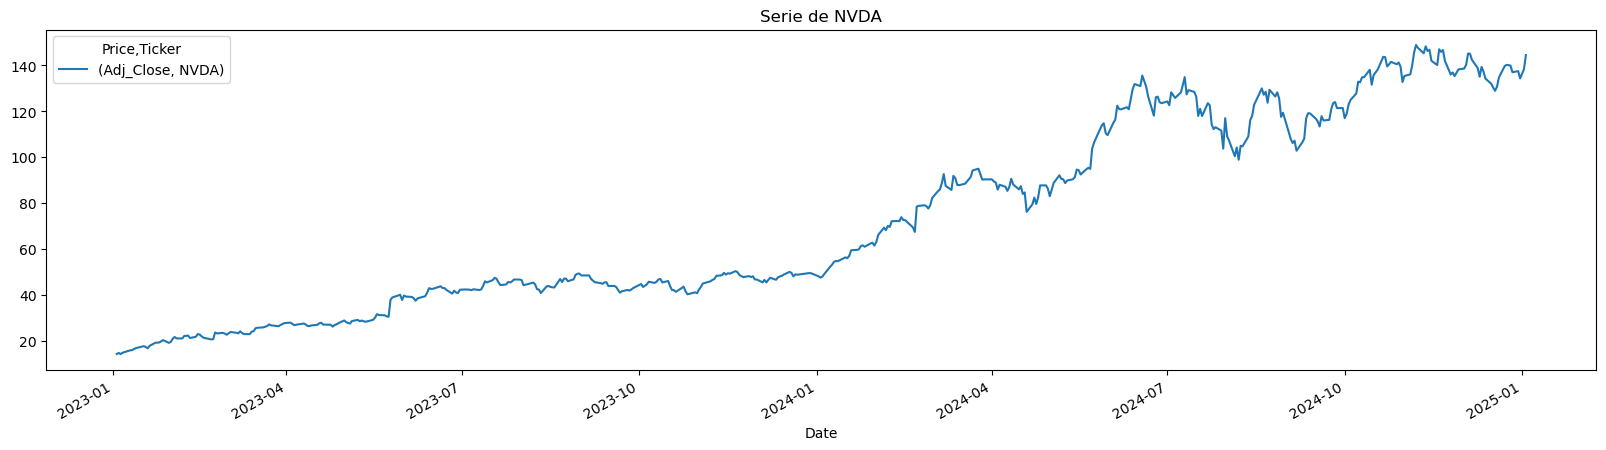

In [17]:
precios_ajustados.plot(figsize=(20,5), title = "Serie de NVDA")
plt.show()

Descomposición con period = 21


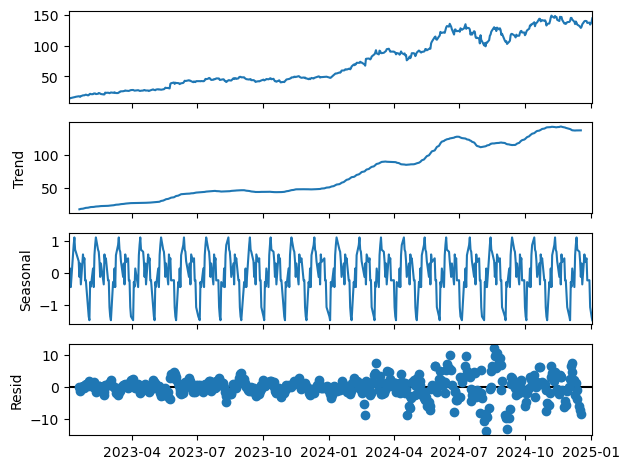

Descomposición con period = 63


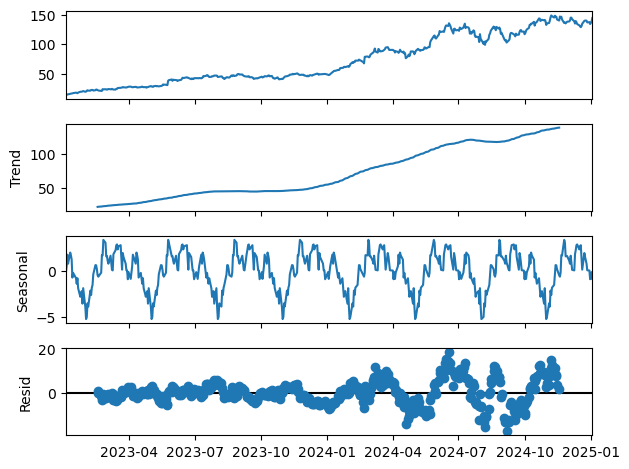

Descomposición con period = 126


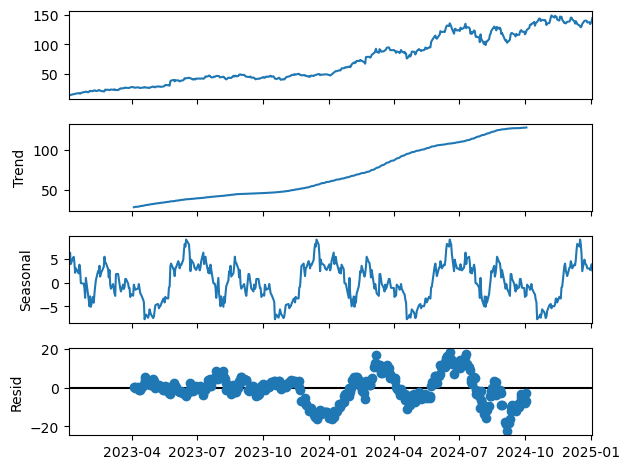

Descomposición con period = 252


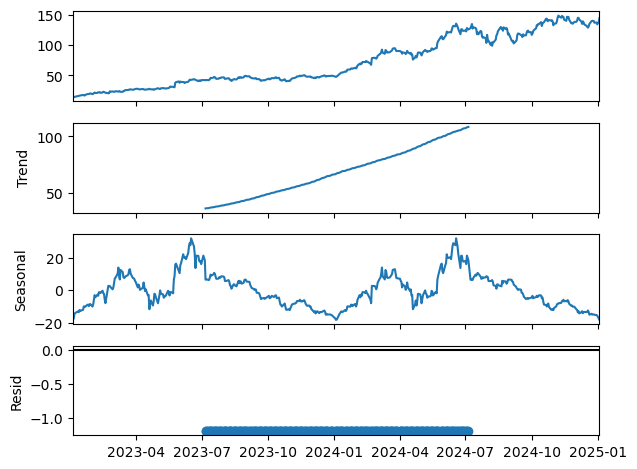

In [18]:
for p in [21, 63, 126, 252]:
    result = seasonal_decompose(precios_ajustados['Adj_Close'], model='additive', period=p)
    print(f"Descomposición con period = {p}")
    result.plot()
    plt.show()

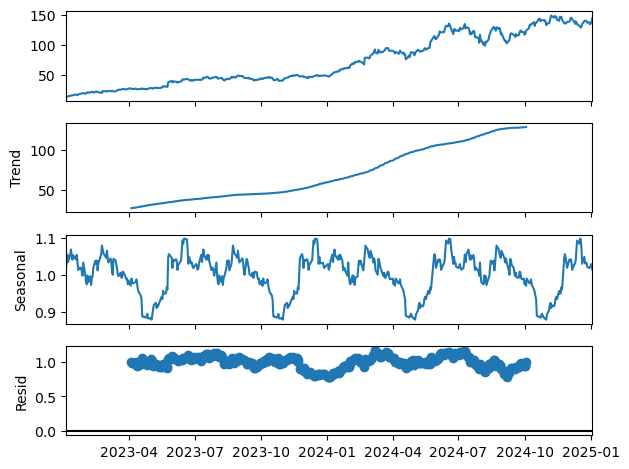

In [19]:
# Realizar la descomposición estacional multiplicativa
result = seasonal_decompose(precios_ajustados['Adj_Close'], model='multiplicative' , period=126)

# Graficar los resultados
result.plot()
plt.show()

In [20]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

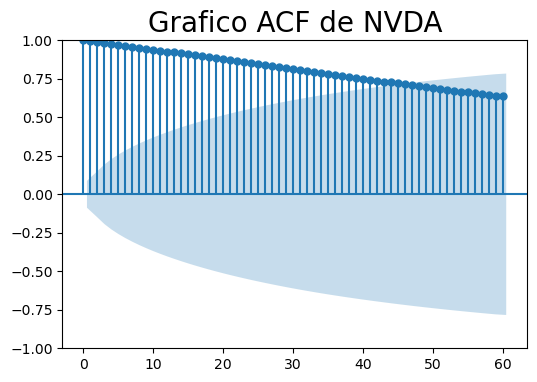

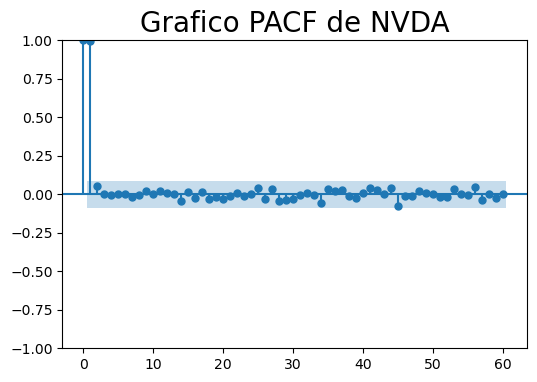

In [21]:
plot_acf(precios_ajustados.Adj_Close,lags=60)
plt.title("Grafico ACF de NVDA", size= 20)
plot_pacf(precios_ajustados.Adj_Close,lags=60)
plt.title("Grafico PACF de NVDA", size= 20)
plt.show()

# vemos datos no estacionarios

In [22]:
tsa.adfuller(precios_ajustados['Adj_Close'], regression='ct',autolag='AIC')

(-2.3367148547427137,
 0.4137580974825305,
 14,
 489,
 {'1%': -3.9774035296590564,
  '5%': -3.4195064995519675,
  '10%': -3.1323541312426393},
 2309.3323574026713)

In [23]:
print(pmdarima.arima.ndiffs(precios_ajustados['Adj_Close']))

1


In [24]:
nvda_diff=precios_ajustados['Adj_Close'].copy()
nvda_diff=nvda_diff.diff(axis = 0, periods = 1)

In [25]:
print(pmdarima.arima.ndiffs(nvda_diff.dropna()))

0


In [26]:
tsa.adfuller(nvda_diff.dropna(), regression='c',autolag='AIC')

(-6.648648542753929,
 5.187880848039393e-09,
 13,
 489,
 {'1%': -3.4437936797256317,
  '5%': -2.867468682890213,
  '10%': -2.5699277594606915},
 2307.4672476597316)

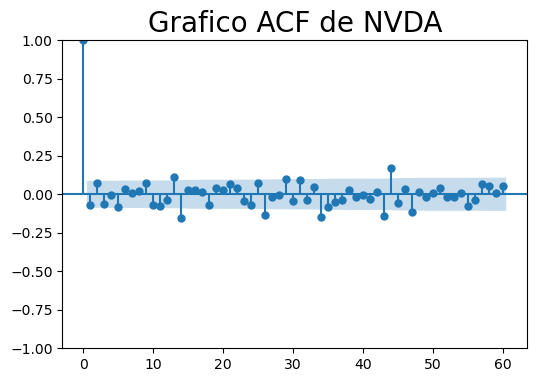

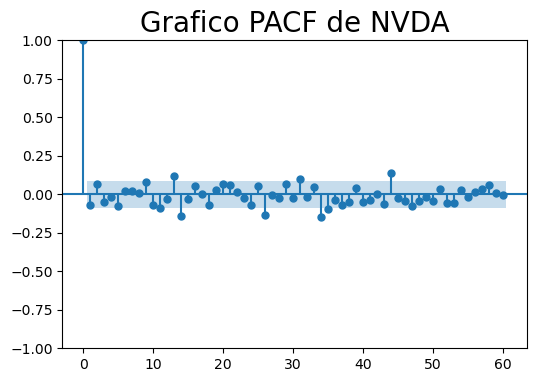

In [27]:
plot_acf(nvda_diff.dropna(),lags=60)
plt.title("Grafico ACF de NVDA", size= 20)
plot_pacf(nvda_diff.dropna(),lags=60)
plt.title("Grafico PACF de NVDA", size= 20)
plt.show()

In [28]:
# train test split
nvda_diff = nvda_diff.dropna()
train_size = int(len(nvda_diff) * 0.8)
train, test = nvda_diff[:train_size], nvda_diff[train_size:]

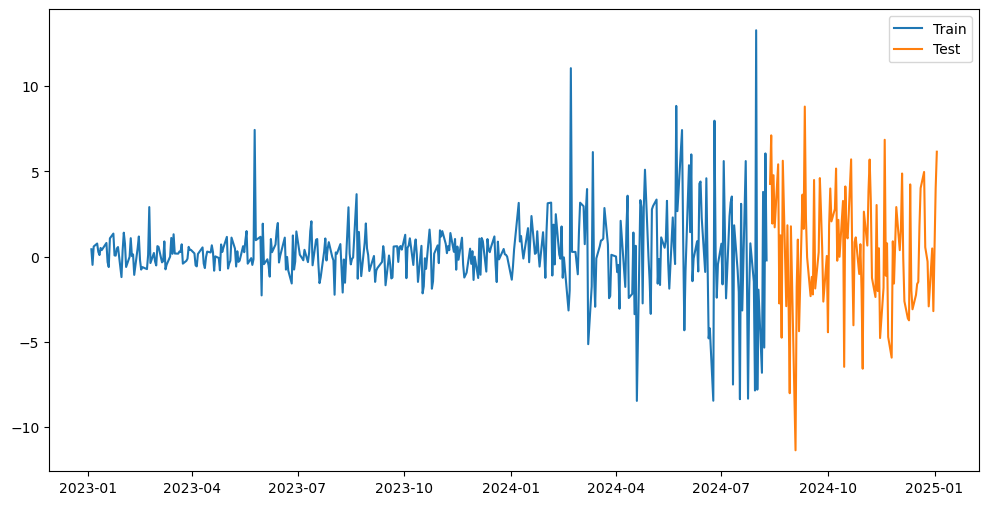

In [29]:
# grafico train y test
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.legend()
plt.show()

In [30]:
import statsmodels.api as sm

In [31]:
datanvda.head()

Price,Close
Ticker,NVDA
Date,
2023-01-03,14.302286
2023-01-04,14.735902
2023-01-05,14.252332
2023-01-06,14.845803
2023-01-09,15.614120


In [32]:
# autoarima para buscar mejores parametros
from pmdarima import auto_arima

# Usamos la columna 'NVDA' del set de entrenamiento
stepwise_model = auto_arima(precios_ajustados['Adj_Close'], start_p=1, start_q=1, start_I=0,
							max_p=5, max_q=5, max_i=2, m=1,
							seasonal=True,
							trace=True,
							error_action='ignore',  
							suppress_warnings=True, 
							stepwise=True)

print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2388.418, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2390.243, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2389.756, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2390.045, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2393.224, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2390.096, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2390.087, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2389.854, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2389.502, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2391.905, Time=0.02 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.425 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  504
M

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(precios_ajustados['Adj_Close'], order=(1, 1, 1))
sarima_fit = sarima.fit(disp=False)


In [39]:
print(sarima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                  504
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1192.952
Date:                Mon, 01 Sep 2025   AIC                           2391.905
Time:                        16:41:55   BIC                           2404.566
Sample:                             0   HQIC                          2396.872
                                - 504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7225      0.157     -4.597      0.000      -1.031      -0.414
ma.L1          0.6514      0.175      3.721      0.000       0.308       0.994
sigma2         6.7224      0.266     25.242      0.0